In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy

In [129]:
n = 10000
m = 1
cov = 1
samples = multivariate_normal.rvs(mean=m, cov=cov, size=n)

In [130]:
def f(x):
    return x + 2*np.sin(2*x)

In [131]:
def f_prime(x):
    return 1 + 2*np.cos(2*x)*2

In [132]:
def linear_approximation(x):
    return f_prime(m) * x + f(m) - f_prime(m) * m

In [133]:
transformed = f(samples)
mean_transformed = np.mean(transformed)
transformed_linearly = linear_approximation(samples)
mean_transformed_linearly = np.mean(transformed_linearly)

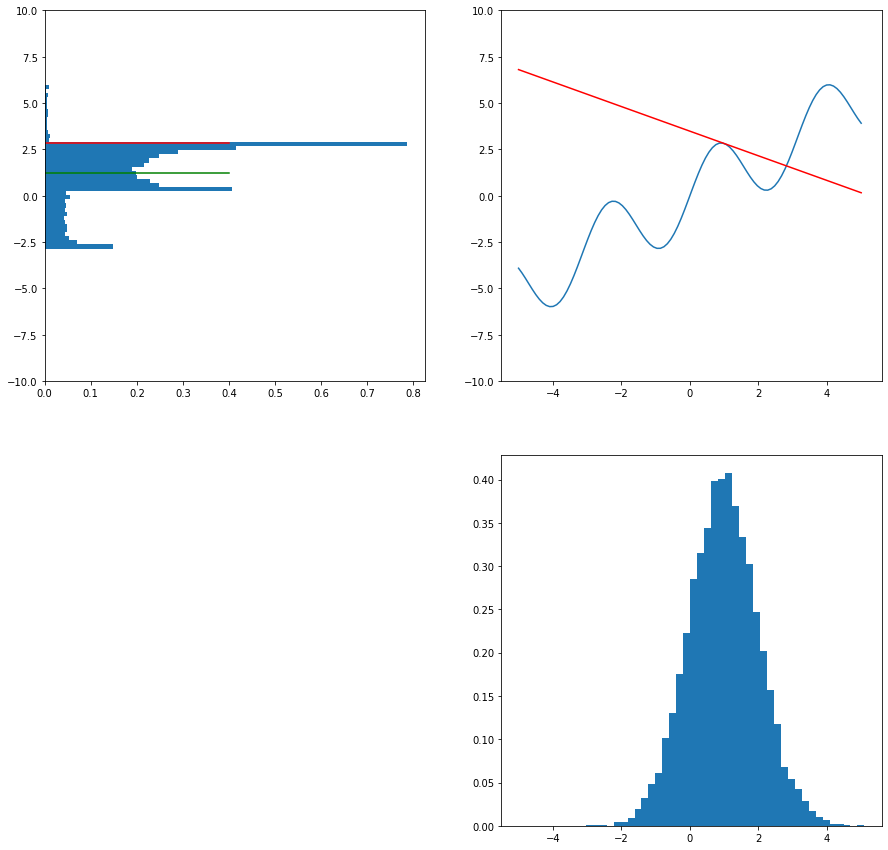

In [134]:
bins = 40
ymin = -10
ymax = 10
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0, 0].hist(transformed, bins=bins, density=True, orientation=u'horizontal')
axs[0, 0].plot([0, 0.4], [mean_transformed, mean_transformed], 'g-')
axs[0, 0].plot([0, 0.4], [mean_transformed_linearly, mean_transformed_linearly], 'r-')
axs[0, 0].set_ylim(ymin, ymax)
t = np.linspace(-5, 5, 100)
axs[0, 1].plot(t, f(t))
axs[0, 1].plot(t, linear_approximation(t), 'r-')
axs[0, 1].set_ylim(ymin, ymax)
axs[1, 1].hist(samples, bins=bins, density=True)
axs[1, 1].get_shared_x_axes().join(axs[1, 1], axs[0, 1])
axs[1, 0].axis('off')
plt.show()